# Clustering Analysis - Math Concepts for Developers 2023.

### Imports

In [6]:
import pandas as pd
import warnings 
import numpy as np
import math
import seaborn as sns
from scipy.stats import norm, t
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import matplotlib.axes as ax
import re
from sklearn.datasets import make_blobs, make_moons, make_circles, make_biclusters
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [7]:
#settings
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

# What is Clustering Analysis?

Well... before we get into that lets first talk a bit about Unsupervised learning and how does it differantiete from Supervised learning.

__Supervised Learnig__ is referring to the type of Statistical Learning that is trainded on labaled data. This means that we are trying to guess a given variable (target) of a dataset, by using other variables to map the target label. Examples of supervised learning models include: Regression algorithms, Decision Trees, Support Vector Machines(SVMs). 

__Unsupervised Learning__ is a bit different. Here we are dealing with data which is't labled. We dont have a target variable associated with each data point and we are simply trying to get a better understanding of the underlying structure of our dataset.

__Clustering Analysis__ is one of the most commonly used methods for performing unsupervised learning. Other methods can be dimentionality reduction (PCA, t-SNE) or association rule mining. Clustering Analysis is a method that classifies data into differend groups (clusters) via a mesure for distance (we'll talk about this more in a bit). 

## What is a Cluster of data?

The exact mathematical definition of a cluster highly depends on the clustering algorithm and distiance function we're using, but in simple terms, we can think of data clusters like differend 'clumps' of data points. Lets see some differnt forms of data clusters below:

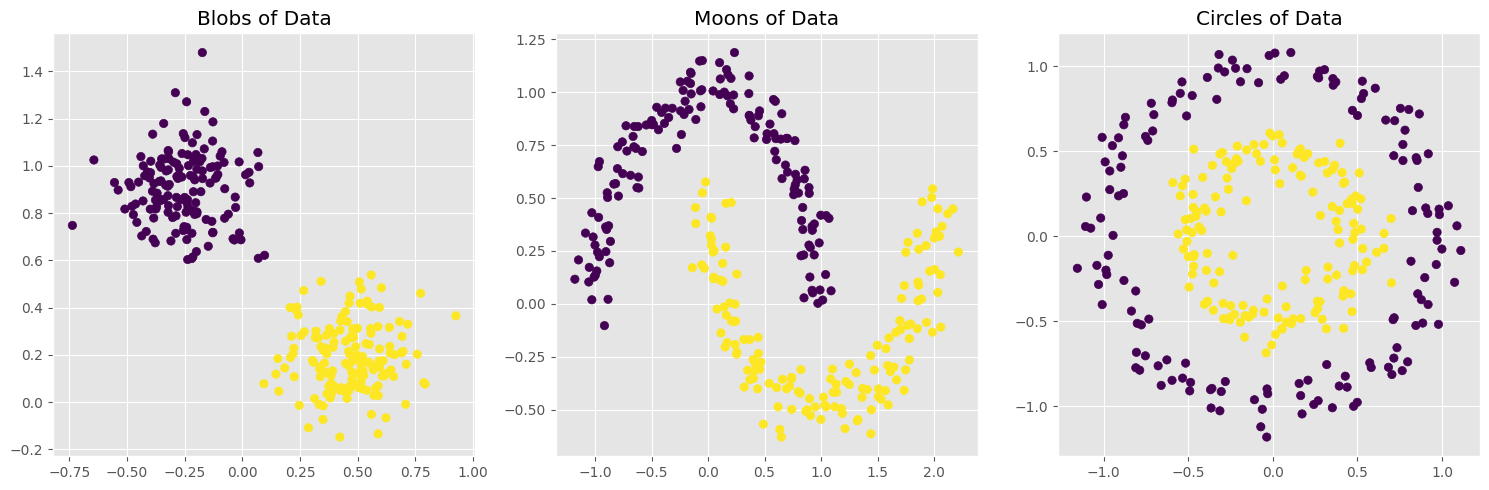

In [8]:
# Generate random blobs, moons and circles of data
X, y = make_blobs(centers=2 ,random_state = 42, cluster_std = 0.15, center_box=(-1,1), n_samples=300)
X1, y1 = make_moons(random_state = 42, noise = 0.08, n_samples=300)
X2, y2 = make_circles(random_state = 42, factor = 0.5, noise = 0.08, n_samples=300)

fig, axes = plt.subplots(nrows = 1, ncols = 3)
fig.set_figheight(5)
fig.set_figwidth(15)
# Visualize blobs
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axes[0].set_title('Blobs of Data')

#Visualize moons
axes[1].scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis')
axes[1].set_title('Moons of Data')

#Visualize circles
axes[2].scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis')
axes[2].set_title('Circles of Data')

fig.tight_layout()
plt.show()

Now these are very exagerated cases, but they help us to get the intuition about clustering and what is a cluster of data. We can see that data can form clusters of different shapes and structures, so we have to choose our distance function and algorithms accordingly.
### Hmm... okay, but  why does data in the real world clusterize?
Real world data tends to clusterize, because many natural and social structures have an inate tendancy to form groups and patterns. 

For example a really prominant use-case for clustering algorithms is reccomender systems. Pepole's interests and preferences have a huge tendancy to clusterize. That is because well... we humans are practically destined for patterns. Our brains always seek out patterns and our intrests tend to be grouped up, because of many factors. If i listen to a lot of metal i get used to the ganre and im less likeley to find other ganres pleasent. This is just one example, but it can be applied to a lot of other problems. Another use-case for clustering algorithms is in sports. Sport Data Scientist often use clustering algorithms to find similar players based on assists, passes, speed, etc. This helps them find structure in the playstyle of certian players. This is possible because for every position, there are some traits that are more advantageous than others, that's why we can find similarites in the traits of similar players. A goalkeeper might not run as fast as a winger, because it's not that important to him, but he may have a faster reaction time. This way if we look at enough players we can see groups (clusters) forming based on their traits.

## Clustering algorithms

There are many clustering algorithms, some commonly used algorithms are __K-Means clustering__, __Hierarchical clustering__, __DBSCAN__.

### K-Means clustering:
In K-Means clustering we select $ n $ (previosly specified) number of center points, we'll call these points centroids. This is what we call initialization. These points now become the centers of our clusters. Now we calculate the distiance of each point of our dataset to each of our clusters, assign them according  to the closest centroid and voila, we have some form of structure. We are going to call these current clusters 'prototypes'. Now that we have our prototypes, we calculate the new centroids of our clusters and reclassify all the points. Then we repeat the algorithm untill the classification of data points to clusters does not change between iterations. When our algorithm reaches this state, we can say that it has converged. We can mathematically express our objective function as: $J = {\displaystyle\sum_{i=1} ^{n}}\displaystyle\min_{u_i\in C} \mid\mid{x_i - u_i}\mid\mid^2$

This is what we call an iterative algorithm, another example of an iterative algorithm can be Gradient Descent. Since K-means clustering minimizes a distiance function between data points, K-means clustering is always guaranteed to converge, because we know that that there is an optimal way to classify our data such that the total distiance is the least it could possibly be.

While K-means clustering is a really usefull algorithm id does have downsides. The biggest downside of K-means clustering is its dependancy on initialization. So how can we battle this initialization? Well... there is a way (kinda). What we can do is instead of chosing random values for all of our centers, we only choose a random value for the first one, then we can choose a point that is far away from our first center, then a point that is far away from both and so on. 

We can do that by calculating the distiance ($ \mid\mid{x_i - u_i}\mid\mid^2 $) of every data point ($ x $) to the current centers ($u_i$). Then we select a point randomly, based on the distribution of the distiance to the points. Our probability ($ P_x $) is: $
P_x = {{\displaystyle\mid\mid{x - u}\mid\mid^2} \over \displaystyle\sum_{i=1} ^{n} \mid\mid{x_i - u_i}\mid\mid^2} $ , thus the further away a point is to the centers, the more likley it is to be selected as the next center. This algorithm is called __K-means++__.

### Agglomerative clustering (also called hierarchical clustering)

Agglomerative clustering is another iterative algorithm, but it is quite different. In Agglomerative clustering, we calculate the distance between every point and collect the results in a matrix. We call that a __distance matrix__. After we have the distance between all of the points in our dataset, we make every point its own cluster. Then, we can combine the two closest clusters into one. We then calculate the distance matrix again and repeat the algorithm untill there are only n clusters(specified).

This main advantege of this algorithm is that it lets us plot __dendograms__. A dendogram is a visualization of binary clustering. think of it like an inversed descision tree with distance as its descision function.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise. Whoa, that's a mouthfull. Lets start from the beginning: When we cluster data by eye we cluster it using density - clusters are in the regions with high density and outliars are in the regions of low density. That's where Density-Based comes from. 

So how can we mesure density? Well, we have to find how many points are close to eachother, we do that by first finding how many points are close to each point, we can set a parameter for the benchmark of 'close' - lets call that parameter $c$. So now all points with distance less or equal to $c$ are considered close. This is the same as drawing a circle with radius $c$ around every point and seeing which points toch the circle, those points are considered close. Now that we know which points are close to which we can assign our so called __Core Points__. A point is considered a core point if there are more than $n$ points that are close to it. All points that have $< n$ close points are considered to be non core. Now that we have all of our core points, we pick one random core point and assign it to the first cluster. Now we assign all close points to that point to the cluster. Now we repeat it with every new point of the cluster. One thing worth mentoning here is that we have to be carefull and only assign core points to the cluster(even if a none core point is close to a point of the cluster). Once we have extended our cluster to its maximum and there are no close core points left, we add the non core points to the cluster, but we dont use them to extend the cluster any further. Voila! We have our first cluster!

We create the second cluster using the same methodology as the first cluster, using the core points that are not close to the core points of the first cluster, but are close to eachother. After we've created all available clusters, all the remaining points that are not assigned to any of the clusters are considered to be __outliers__.

Clustering is also commonly used for dimentionality reduction via __t-SNE__, or 

### t-distributed Stochastic Neighbor Embedding
##### A meme i found when looking for recources:
<img src='Screenshot 2023-05-21 120549.png' width = '400' height = '400' />
Whoa. That's a mouthful. It sounds scary, but it's a pretty intuitive algorithm. The main goal of t-SNE is to perform dimentionality reduction, without losing the structure of the dataset. This can be hard, because in some cases, we cant really use projections, without losing the clustered structure of our data. Lets look at an example:

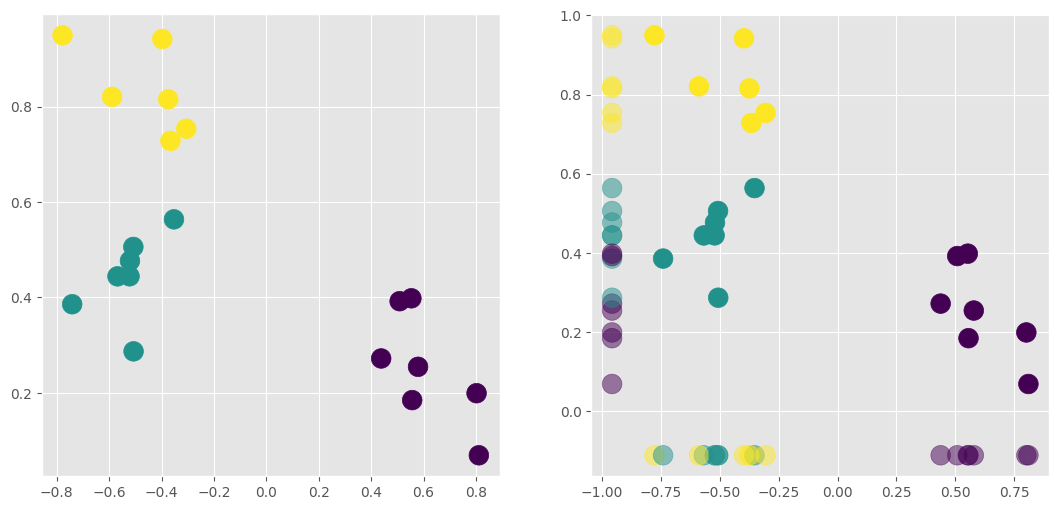

In [53]:
# Generate synthetic data using the make_blobs function
Xt, yt = make_blobs(centers=3, random_state=46, cluster_std=0.15, center_box=(-1,1), n_samples=20)

# Create a figure and axis for plotting
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(13)

# Plot the original data in the first subplot
ax[0].scatter(Xt[:, 0], Xt[:, 1], c=yt, cmap='viridis', s=200)

# make projections
xtest = np.full((len(Xt[:, 1]), 1), min(Xt[:, 1]-0.18))
ytest = np.full((len(Xt[:, 0]), 1), min(Xt[:, 0]-0.18))

# Plot the projections in the second subplot
ax[1].scatter(Xt[:, 0], Xt[:, 1], c=yt, cmap='viridis', s=200)
ax[1].scatter(Xt[:, 0], xtest, c=yt, cmap='viridis', s=200, alpha=0.5)
ax[1].scatter(ytest, Xt[:, 1], c=yt, cmap='viridis', s=200, alpha=0.5)

# Display the figure with the plots
fig.show()

We can see here that if we were to project the data on its x or y axis, the clusters in the data would've been lost in the transition. This is a huge problem and one way to solve it is via t-SNE. So, how does t-SNE solve the problem at hand? Well... it's not all that different from clustering. First we want to find the __similarity__ of all the points to each other. So how do we find a similarity based on distance? Well... First me measure all the distances between each point, then we can plot the distance of each point to our point of intrest (a point of intrest is just the point we are looking at) on a line, under a normal distribution curve and mesure the distance between the line of the distribution and our point.:

Text(0, 0.5, 'Similarity')

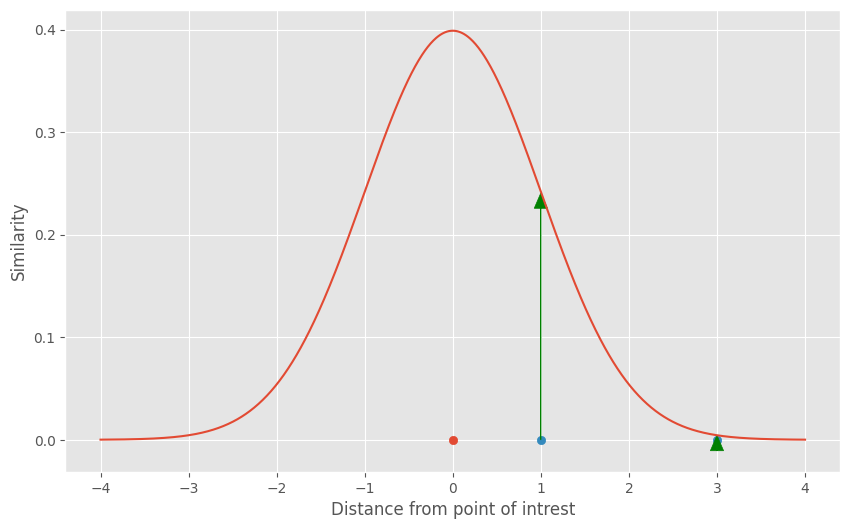

In [14]:
# Define the x-axis values for the distributions
x = np.linspace(-4, 4, 1000)

# Calculate the y-axis values for the normal distribution
pdf_normal = norm.pdf(x, loc=0, scale=1)

# Create the plot
plt.figure(figsize = (10,6))

plt.plot(x, pdf_normal, label='Normal Distribution')
plt.scatter([0],[0])
plt.scatter([1,3],[0,0])
plt.arrow(1,0,0,pdf_normal[625], length_includes_head=True, fc='g', ec='g',head_width=0.15, head_length=0.015)
plt.arrow(3,0,0,pdf_normal[500 + 3*125], length_includes_head=True, fc='g', ec='g',head_width=0.15, head_length=0.015)
plt.xlabel('Distance from point of intrest')
plt.ylabel('Similarity')

The width of the curve is determined by the density around our point of intrest. The density is determend based on a pre-defined preplexity parameter. The preplexity parameter tells us how many points around our point of intrest should be chosen when determinig the density. There are some  important things to note here, one is that we should always scale the similarity scores for each point, so that they add up to 1, because of the difference in width on every normal curve. And the second important note is that if two of the same points have different similarity scores for each direction, we take the avarage when measuring the similarity.

Now that we have all of our similarity scores, we can make a matrix, that shows how similar each point is to one another. Now we randomly project our data points to a lower dimentional space(in our case a 1D number line) and using a t-distribution we mesure the similarity scores for our 1D projected data. But wait.. what's a t distribution? A t-distribution is related to a normal distribution, but it's tails are a bit higher:

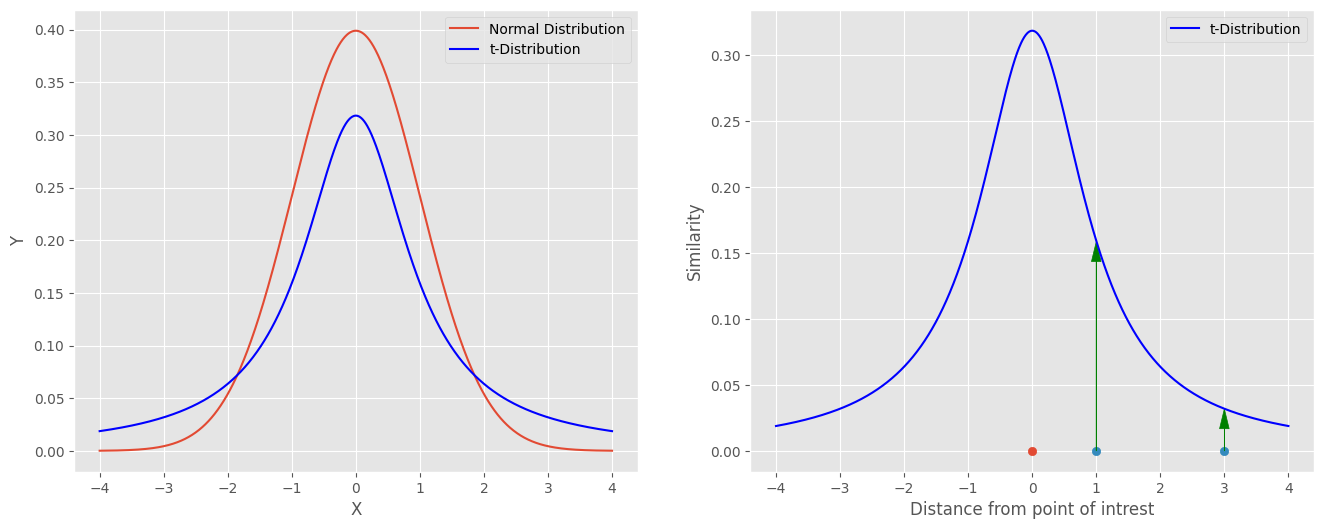

In [15]:
# Define the x-axis values for the distributions
x = np.linspace(-4, 4, 1000)

# Calculate the y-axis values for the normal distribution
pdf_normal = norm.pdf(x, loc=0, scale=1)

# Calculate the y-axis values for the t-distribution
pdf_t = t.pdf(x, df=1)

# Create the plot
fig, ax = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(16)

ax[0].plot(x, pdf_normal, label='Normal Distribution')
ax[0].plot(x, pdf_t, label='t-Distribution', c='b')
ax[0].legend(loc='best')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].plot(x, pdf_t, label='t-Distribution', c='b')
ax[1].scatter([0],[0])
ax[1].scatter([1,3],[0,0])
ax[1].arrow(1,0,0,pdf_t[625], length_includes_head=True, fc='g', ec='g',head_width=0.15, head_length=0.015)
ax[1].arrow(3,0,0,pdf_t[500 + 3*125], length_includes_head=True, fc='g', ec='g',head_width=0.15, head_length=0.015)


ax[1].legend(loc='best')
ax[1].set_xlabel('Distance from point of intrest')
ax[1].set_ylabel('Similarity')

plt.show()

Now that we have both the matricies for the similarity scores of the 2D and 1D data, our goal is to move the points in the 1D space in such a way that tha two matricies look the same. We use a t-distribution for the reduced data, to prevent it from clumping up.

Lets implement the algorithm on the data we have above:

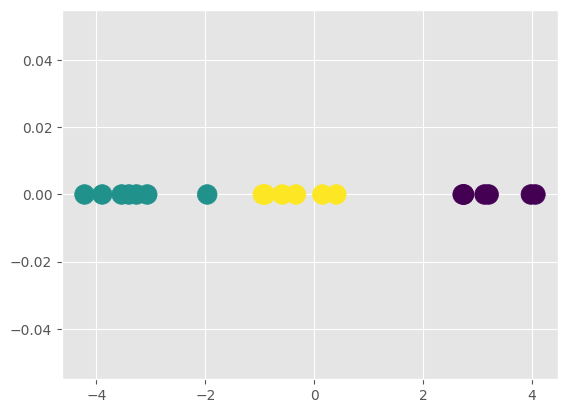

In [16]:
# Generate the data
Xt, yt = make_blobs(centers=3, random_state=46, cluster_std=0.15, center_box=(-1,1), n_samples=20)

# Initiate the t-SNE model (we have to give a really small learning rate value)
tsne = TSNE(n_components=1, perplexity=5, learning_rate=0.001)

# Fit the model to the data and transform it to 1D
Xt_tsne = tsne.fit_transform(Xt)

# Plot the 1D t-SNE representation
plt.scatter(Xt_tsne, np.zeros_like(Xt_tsne), c=yt, s=200)
plt.show()


And just like that, we can see that after applying t-SNE we have succesfully reduced the dimentionality of our data without losing any of the clusters.

## Distance Metrics

Okay, we know how our clustering algorithms work, but lets look a bit deeper, what is going on 'under the hood'? Lets look at how we mesure distance between two points:

### Euclidean (L2) Distance

In school we learned about the Pythagorean theorem: It states that in a right triangle, the square of the hyphothanos equals the sum of squares of the sides, or: $ c^2 = a^2 + b^2 $ . So how can we apply the theorem here? well... we can draw a right triangle where the distance between the two points is the hypothanos:

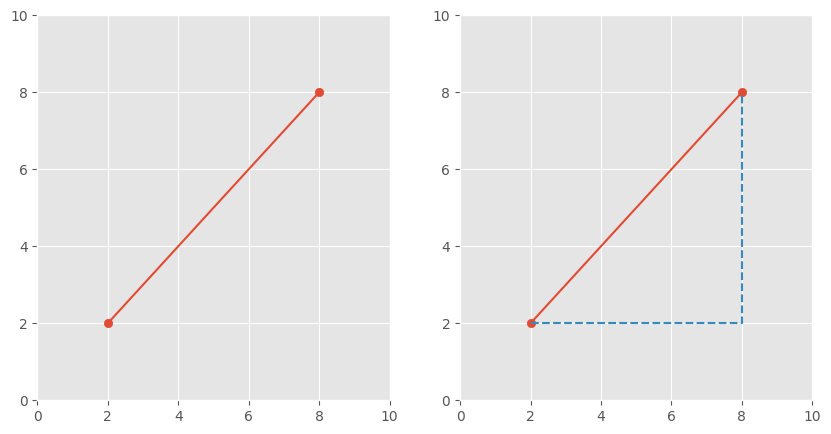

In [55]:
# Create a figure with 1 row and 2 columns for subplots
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(10)

# Set the x-axis and y-axis limits for all subplots
for axs in ax.flat:
    axs.set_xlim(0, 10)
    axs.set_ylim(0, 10)

# Plot data and lines in the first subplot
ax[0].scatter([2, 8], [2, 8])
ax[0].plot([2, 8], [2, 8])

# Plot data and lines in the second subplot
ax[1].scatter([2, 8], [2, 8])
ax[1].plot([2, 8], [2, 8])
ax[1].plot([2, 8, 8], [2, 2, 8], linestyle='--')

plt.show()

Okay, now that we have our right triangle, all we have to do is calculate the lenght of sides. We do that by subtracting the x and y values from each of the points (since we're going to cube the sides it doesnt matter if its positive or negative). 

We can express this mathmatically as: $ d = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2} = \sqrt{(\Delta x)^2 + (\Delta y)^2} $. In our case: 

$\Delta x = 2 - 8 = -6$,

$\Delta y = 2 - 8 = -6$, 

$d = \sqrt{72} = ~8.5$.

The Euclidean distiance is effective when predicting blobs, but it struggles with more complex structures. Lets look at some other metrics:

### Taxicab / Manhattan (L1) Distance
Manhattan Distance mesures the distance between two points only using vectors that move in right angles. The name comes from the structure of the citi Manhattan, because its built in rectangular blocks, almost resembling a chess board: <img src='Manhatten birds eye.jpg' width = '500' height = '700' />

Lets imagine we are a taxi driver and we had to drive around the city. We cant move in diagonals, so we are always moving in right angles, just as if we were moving along grid lines. This is the intuition behind the __Taxicab__ distance.

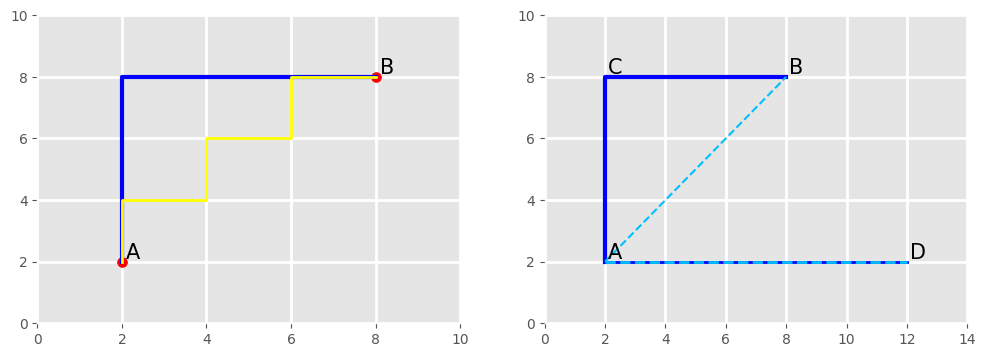

In [18]:
# Create a new figure with size 12x4
plt.figure(figsize=(12, 4))

# Create a subplot on the left
plt.subplot(121)  # 1 row, 2 columns, plot 1

# Set the grid lines to white with a linewidth of 2
plt.grid(c='white', linewidth=2)

# Add red points at coordinates (2, 2) and (8, 8)
plt.scatter([2, 8], [2, 8], c='r', s=50)

# Add labels 'A', 'B', and 'C' at (2, 2), (8, 8), and (12, 2), respectively
x = [2, 8, 12]
y = [2, 8, 2]
labels = ['A', 'B', 'C']
for i, lab in enumerate(labels):
    plt.annotate(lab, (x[i] + 0.1, y[i] + 0.1), fontsize=15)

# Draw lines connecting the points
plt.plot([2, 2, 8], [2, 8, 8], c='b', linewidth=3)
plt.plot([2, 2, 4, 4, 6, 6, 8], [2, 4, 4, 6, 6, 8, 8], c='yellow', linewidth=2)

# Set the x and y axis limits to (0, 10)
plt.ylim(0, 10)
plt.xlim(0, 10)

# Create a subplot on the right
plt.subplot(122)  # 1 row, 2 columns, plot 2

# Set the grid lines to white with a linewidth of 2
plt.grid(c='white', linewidth=2)

# Add red points at coordinates (2, 2), (8, 8), (12, 2), and (2, 8)
x = [2, 8, 12, 2]
y = [2, 8, 2, 8]
labels = ['A', 'B', 'D', 'C']
for i, lab in enumerate(labels):
    plt.annotate(lab, (x[i] + 0.1, y[i] + 0.1), fontsize=15)

# Draw lines connecting the points.
plt.plot([2, 2, 8], [2, 8, 8], c='b', linewidth=3)
plt.plot([2, 12], [2, 2], linewidth=2, c='b')
plt.plot([2, 12], [2, 2], linewidth=2, linestyle='--', c='deepskyblue')
plt.plot([2, 8], [2, 8], linestyle='--', c='deepskyblue')
plt.ylim(0, 10)
plt.xlim(0, 14)

# Show the plot
plt.show()



Okay... there is a lot to unpack from the ilustration above.
#### 1. Defining Taxicab distance
We can see that the yellow and darkblue lines both have the same lenght of 12, although they take different paths. With this in mind, we can conclude that the most effective and simple way to mesure the taxicab distance between two points would be to add their difference in x and y. We can define this mathmatically as: $ d = {\mid x_B -x_A \mid} + {\mid y_B - y_A \mid}$

#### 2. How does taxicab distance affect performance?
Well lets look at the graph above again. The Euclidean distance between the points $A,B$ is less than the Euclidean distance between the points $A, D$. Okay, but what happens if we use the Taxicab method? The Taxicab distance between the points $A,B$ is is greater than the taxicab distance between the points $A, D$. So in other words, Euclidean distance thinks that $B$ is closer to  $A$, but taxicab distance thinks that $D$ is closer to $A$. Intresting. So Taxicab distance punishes the differance between the axes.

Lets try and implement this into our example above:

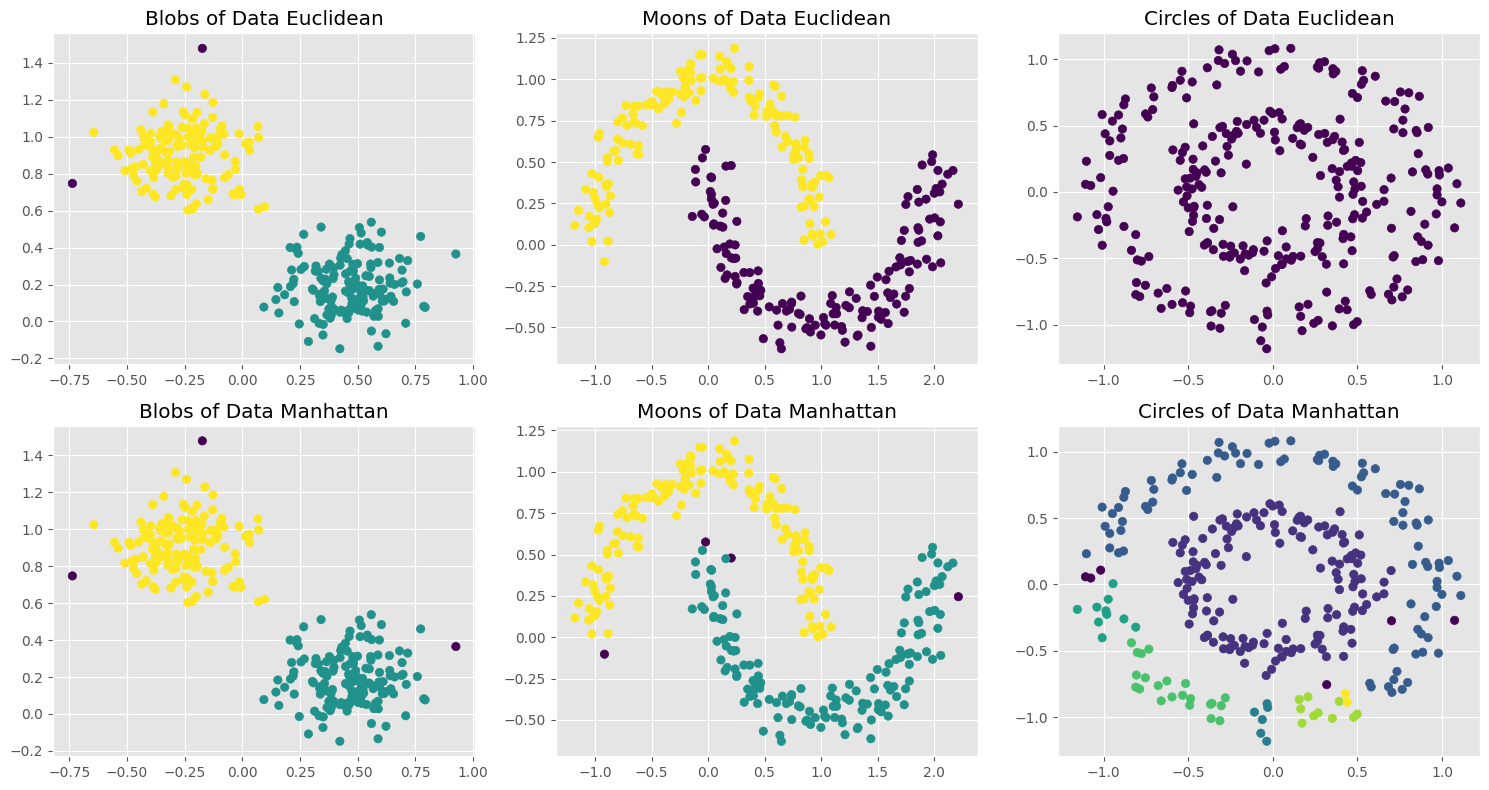

In [19]:
dbs = DBSCAN(metric='euclidean', eps=0.2)

fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.set_figheight(8)
fig.set_figwidth(15)
# Visualize blobs
dbs_blob_pred = dbs.fit_predict(X)
axes[0,0].scatter(X[:, 0], X[:, 1], c=dbs_blob_pred, cmap='viridis')
axes[0,0].set_title('Blobs of Data Euclidean')

#Visualize moons
dbs_moons_pred = dbs.fit_predict(X1)
axes[0,1].scatter(X1[:, 0], X1[:, 1], c=dbs_moons_pred, cmap='viridis')
axes[0,1].set_title('Moons of Data Euclidean')

#Visualize circles
dbs_circles_pred = dbs.fit_predict(X2)
axes[0,2].scatter(X2[:, 0], X2[:, 1], c=dbs_circles_pred, cmap='viridis')
axes[0,2].set_title('Circles of Data Euclidean')
#########################################################################

dbs = DBSCAN(metric='manhattan', eps=0.2)
dbs_blob_pred = dbs.fit_predict(X)
axes[1,0].scatter(X[:, 0], X[:, 1], c=dbs_blob_pred, cmap='viridis')
axes[1,0].set_title('Blobs of Data Manhattan')

#Visualize moons
dbs_moons_pred = dbs.fit_predict(X1)
axes[1,1].scatter(X1[:, 0], X1[:, 1], c=dbs_moons_pred, cmap='viridis')
axes[1,1].set_title('Moons of Data Manhattan')

#Visualize circles
dbs_circles_pred = dbs.fit_predict(X2)
axes[1,2].scatter(X2[:, 0], X2[:, 1], c=dbs_circles_pred, cmap='viridis')
axes[1,2].set_title('Circles of Data Manhattan')


fig.tight_layout()
plt.show()

#### Manhattan distance is more sensitive towards outliers than Euclidean
We can see that on the Blue cluster on the blobs chart, the Manhattan distance classified the most left point as an outlier, but the Euclidian did not. This can be a blessing and a curse, because if we look at the moons structure, the manhattan metric classified some of the points as outliers where they really shouldnt be.

### Okay, but what if we wanted the best of both worlds?... Introducing....

## Minkowski Distance

Minkowski distance is basically a generalization of both manhattan and euclidean distance. Its defined mathematically as:
$D(x,y) = {\Biggl({\displaystyle\sum_{i=1} ^{n} {\mid x_i - y_i \mid}^p\Biggl)}^{1\over p}}$

Why is it a generalization of the above? Well... let's see. If $p = 1$, $D(x,y) = {\Biggl({\displaystyle\sum_{i=1} ^{n} {\mid x_i - y_i \mid}^1\Biggl)}^{1\over 1}} = {\displaystyle\sum_{i=1} ^{n} {\mid x_i - y_i \mid}}$. Hmm.. this is oddly close to the manhattan distance. 
Lets see what hapens when we give a value of $p=2$:

Since ${a^{1 \over 2}} = { \sqrt a}$ :
If $p=2$, $D(x,y) = {\Biggl({\displaystyle\sum_{i=1} ^{n} {\mid x_i - y_i \mid}^2\Biggl)}^{1\over 2}} = \sqrt{\displaystyle\sum_{i=1} ^{n} {\mid x_i - y_i \mid}^2}$

Now we get something that looks a lot like Euclidean distance.

A really nice way to gain intuition on the differance between these distances is to take a look at their unit circles. A unit circle is just a circle, drawn by all the points that have a distance from the point $(0,0) = 1$ in the given space. So in euclidean geometry, this would be a normal circle, but for taxicab geometry, it would be a square:
<img src='2D_unit_balls.svg.png' width = '2000' height = '2000' />

This means, that given our task, we can choose a 'Squircle' that is just as close to a square or a circle as we want, that reflects the geometry we want for our distance.

 ### Cosine Distance (Cosine similarity)

Coisne similarity mesures the distance between points using the cosine of the angle between the vectors from the (0,0) point to the two points. We can calculate the angle between two vectors via their dot product: $\cos(A,B) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}$

Theta: 31.5
Cosine Similarity: 0.853


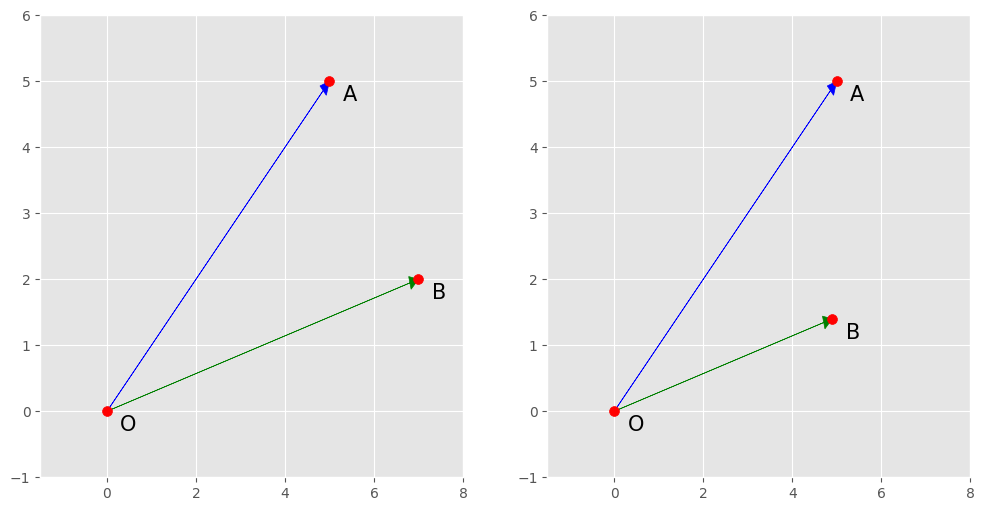

In [21]:
# Create first subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x = [5, 7, 0]
y = [5, 2, 0]
labels = ['A', 'B', 'O']

ax1.set_xlim(-1.5, 8)
ax1.set_ylim(-1, 6)

# plot vector from O to A
ax1.arrow(x[2], y[2], x[0]-x[2], y[0]-y[2], length_includes_head=True,
          head_width=0.2, head_length=0.2, fc='b', ec='b')

ax1.scatter(x[0], y[0], c='r', s=50)
ax1.annotate(labels[0], (x[0] + 0.3, y[0] - 0.3), fontsize=15)

# plot vector from O to B
ax1.arrow(x[2], y[2], x[1]-x[2], y[1]-y[2], length_includes_head=True,
          head_width=0.2, head_length=0.2, fc='g', ec='g')

ax1.scatter(x[1], y[1], c='r', s=50)
ax1.annotate(labels[1], (x[1] + 0.3, y[1] - 0.3), fontsize=15)

ax1.scatter(x[2], y[2], c='r', s=50)
ax1.annotate(labels[2], (x[2] + 0.3, y[2] - 0.3), fontsize=15)


# Create second subplot
ax2.set_xlim(-1.5, 8)
ax2.set_ylim(-1, 6)

# plot vector from O to A
ax2.arrow(x[2], y[2], x[0]-x[2], y[0]-y[2], length_includes_head=True,
          head_width=0.2, head_length=0.2, fc='b', ec='b')

ax2.scatter(x[0], y[0], c='r', s=50)
ax2.annotate(labels[0], (x[0] + 0.3, y[0] - 0.3), fontsize=15)

# plot vector from O to B with shorter length
ax2.arrow(x[2], y[2], (x[1]-x[2])*0.7, (y[1]-y[2])*0.7, length_includes_head=True,
          head_width=0.2, head_length=0.2, fc='g', ec='g')

ax2.scatter((x[1]-x[2])*0.7, (y[1]-y[2])*0.7, c='r', s=50)
ax2.annotate(labels[1], ((x[1]-x[2])*0.7 + 0.3, (y[1]-y[2])*0.7 - 0.3), fontsize=15)

ax2.scatter(x[2], y[2], c='r', s=50)
ax2.annotate('O',(0 + 0.3,0 - 0.3), fontsize=15)

theta = round(np.dot(a = [x[2], y[2], x[0]-x[2], y[0]-y[2]],  b = [x[2], y[2], (x[1]-x[2])*0.7, (y[1]-y[2])*0.7]), 2)
print('Theta:', theta)
print('Cosine Similarity:', round((np.cos(theta*(math.pi/180))), 3))

This is a __really__ intresting metric, since no matter how long our vectors are, the distance stays the same: Just like in the example above. The cosine similarity between the points $A,B$ stays the same, despite the vector $OB$ getting shorter. In our case, the cosine similarity is: $\cos(31.5) = 0.85$

Cosine similarity is mainly used in NLP tasks, when mesuring the similarity between texts. Since one text might be longer, but have the same meaning and talk about the same topic, cosine similarity is a perfect metric for the task. Well... why dont we try it out?

Lets say we have 2 texts. We can plot the counts of each word in the text as:

In [22]:
def plot_similarity(docs):
    # create a CountVectorizer object with binary=False
    vectorizer = CountVectorizer(binary=False)
    
    # fit and transform text
    X = vectorizer.fit_transform(docs)
    
    # get the complete vocabulary
    vocab = vectorizer.vocabulary_
    
    # create a new array with zeros of the same shape as X
    X_new = np.zeros(X.shape)
    
    # loop through the indices and values of X
    for i, j, v in zip(X.nonzero()[0], X.nonzero()[1], X.data):
        # get the corresponding index of the word in the vocabulary
        idx = vocab.get(vectorizer.get_feature_names_out()[j])
        # set the value at the new array to the actual count from X
        X_new[i, idx] = v
    
    # plot the new array
    plt.scatter(X_new[0][0], X_new[0][1],c='b', s=50)
    plt.scatter(X_new[1][0], X_new[1][1],c='r', s=50)
    plt.arrow(0, 0, X_new[0][0], X_new[0][1], length_includes_head=True,
              head_width=0.1, head_length=0.1, fc='g', ec='g')
    plt.arrow(0, 0, X_new[1][0], X_new[1][1], length_includes_head=True,
              head_width=0.1, head_length=0.1, fc='g', ec='g')
    plt.xlim(-0.1,)
    plt.ylim(-0.1,)
    plt.xlabel('Learning')
    plt.ylabel('Machine')
    plt.legend(labels=[docs[0], docs[1]])
    
    # calculate dot product and cosine similarity
    dot = round(np.dot(a = [X_new[0][0], X_new[0][1]],b = [X_new[1][0], X_new[1][1]]), 2)
    theta = math.acos(dot / (np.linalg.norm([X_new[0][0], X_new[0][1]]) * np.linalg.norm([X_new[1][0], X_new[1][1]])))
    cosine_sim = round((np.cos(theta)), 3)
    
    print('Cosine similarity:', cosine_sim)
    
    plt.show()


Cosine similarity: 0.981


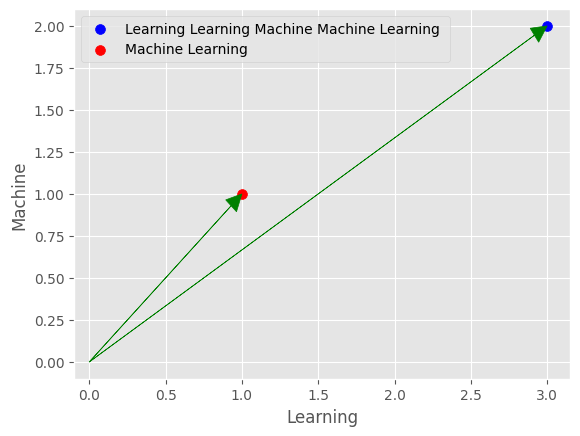

In [23]:
plot_similarity(["Learning Learning Machine Machine Learning ", "Machine Learning"])

We can see that the text's are really similar to eachother, even if one is more than twice longer.

Cosine similarity: 1.0


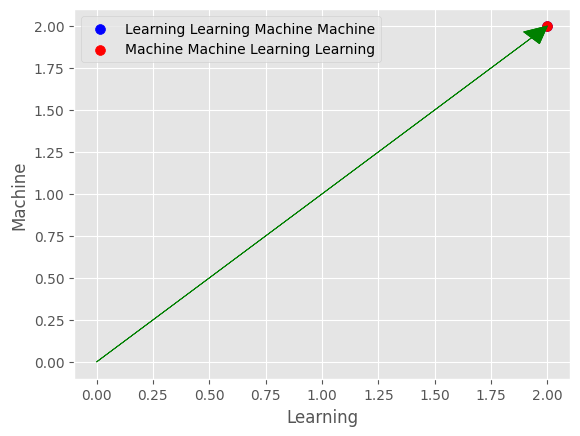

In [24]:
plot_similarity(["Learning Learning Machine Machine", "Machine Machine Learning Learning"])

When two texts have the same words, they have a cosine similarity of 1.

Cosine similarity: 0.0


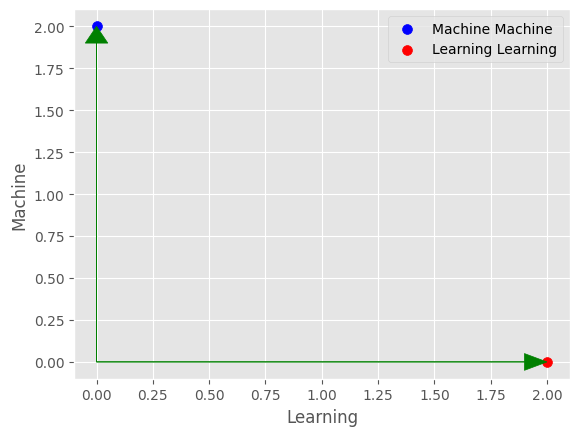

In [25]:
plot_similarity(["Machine Machine", "Learning Learning"])

When texts have no common words between them, they have a cosine similarity of 0.

Okay, now we have a basic intuition on how cosine similarity works, lets try to scale it up. Since we're going to be working with text with a lot more than 2 words, that means we're going to be dealing with a lot more than 2 dimentions, therefore we have to find a way to calculate the cosine similarity without calculating the angle between vectors to make everything faster. We do that using this formula: $Cosine \hspace{1mm} Similarity = \frac{\sum\limits_{i=1}^{n} A_i B_i}{\sqrt{\sum\limits_{i=1}^{n} A_i^2}\sqrt{\sum\limits_{i=1}^{n} B_i^2}}$ We can test this with the first case above: ${(1 x 3) + (1x2) \over \sqrt{(1^2 + 1^2)} \sqrt{(3^2 + 2^2)}} = 0.981$ 


# 

# Lets implement these concepts into a real world scenario

Firstly, we have to get some data. I've gathered some data on cars. We have their power (horsepower) and weight (pounds). My idea is to try and cluster cars by their Weight and Horsepower. My hypothesis being that there can be some clusters: Foe exapmle low weight and high horsepower: supercars. High weight, low horsepower: vans or trucks. 

I am going to be using pandas to read and make operations on my dataset.

Lets see how it looks:

In [26]:
#read our dataframe
df = pd.read_csv(r'cars_dataset.csv')
#vizualize our dataframe
df

,Car Name,Horsepower,Weight
0,Toyota RAV4 2021,203,3370
1,Honda CR-V 2022,190,3307
2,Ford Escape 2021,181,3552
3,Chevrolet Equinox 2022,170,3274
4,Nissan Rogue 2021,181,3459
...,...,...,...
192,Ford Transit Connect,169,4547
193,Ram ProMaster City,178,4073
194,Nissan NV200,131,3476
195,Chevrolet City Express,131,3940


We can see that we have 197 records in our datarame, which is not that much, but it's enough to get a rough representation of our variables. Let's make a scatter plot and see how our data looks like. 

I am going to be using plotly, because it alows us to see the name of each car when we hover on it.

In [56]:
# Create scatter plot using Plotly
fig = px.scatter(df, x='Horsepower', y='Weight', hover_data='Car Name')

# Set plot title and axis labels
fig.update_layout(title='Car Scatter Plot', xaxis_title='X-axis', yaxis_title='Y-axis')

# Show the plot
fig.show()

Before we start applying our clustering models we have to do some preprocessing. Currently one of our variables (Weight) has a far greater range. This makes it so one of the variables has a greater impact on the distance calculated and it can lead to our model clustering only along one of the axes:

In [57]:
features = df[['Horsepower', 'Weight']]

kmeans_model = KMeans(init='k-means++')
clusters_kmeans = kmeans_model.fit_predict(features)

#Create scatter plot using Plotly
fig = px.scatter(df, x='Horsepower', y='Weight', hover_data='Car Name', color=clusters_kmeans)

# Set plot title and axis labels
fig.update_layout(title='Car Scatter Plot', xaxis_title='X-axis', yaxis_title='Y-axis')

# Show the plot
fig.show()

We can see how our model clusterizes our data mostly along the y-axes, because the values there are much greater. This is most evident on cluster 2, where the three points most to the left are way closer (at least on the chart) to cluster 1, yet they are assigned a diferent cluster. To avoid this, we can scale our data, such that the range on all of our variables stays the same. There are many methods we can use to scale our data, but  we'll only look at a few of them.

__Min-Max Scaler (Normalization)__: MinMaxScaler is probably the simplest scaler of them all, yet still effective. It (as the name suggests) scales the data such that the smallest value is 0 and the biggest value is 1 and everything else falls in the middle, relative to the min and max values. This is also called _Normalization_ We can calculate the value for each record of our dataset as: ${x_{new}} = {{x_i - min(x)} \over {max(x) - min(x)}}$

__Standard Scaler (Standartization)__: Standart Scaler scales the data such that the mean is 0 and the standard deviation is 1. This can also be called _Standartization_. We can calculate the standardized values as: ${x_{new}} = {{x_i - \overline{x}} \over \sigma}$

__Robust Scaler__: Similar to the Standard Scaler, but uses the median and interquartile range instead of the mean and standard deviation. The interquartle range excludes the top and bottom 25% of the data. It is more robust to outliers since it scales the data based on the interquartile range, which is not influenced by extreme values as much. We can calculate the value of each record of our dataset as: $ {x_{new}} = {{x_i - Me(x)} \over {Q3 - Q1}}$

#### For now, lets normalize our data and see if it's enough to do the trick:

In [58]:
#defining and fitting our scaler
scaler = MinMaxScaler()
scaler.fit(features)

features = scaler.transform(features)
features[1:5]

array([[0.07358739, 0.22237633],
       [0.06767411, 0.26013253],
       [0.06044678, 0.2172908 ],
       [0.06767411, 0.24580059]])

We can see that now, all of our data has a value between 0 and 1.

### Elbow Method

In [30]:
# Create scatter plot using Plotly
fig = px.scatter(df, x='Horsepower', y='Weight', hover_data='Car Name')

# Set plot title and axis labels
fig.update_layout(title='Car Scatter Plot', xaxis_title='X-axis', yaxis_title='Y-axis')

# Show the plot
fig.show()

Just by looking at the data we cant really decide what's the most optimal number of clusters. So... how do we find the optimal number og clusters? Like many other methods in machine learning - trial and error. In order to mesure how well an algorithm clusters data we normally use two metrics: Distortion and Inertia. 

__Distortion__ measures the avarage squared distance from each centroid to its data points:
$
\text{Distortion with euclidean distance} = {\frac{1}{n}} \sum\limits_{i=1}^{n}\Bigl(\sqrt{(\Delta x_i)^2 + (\Delta y_i)^2}\Bigl)^2
$

__Inertia__ measures the sum of all the distances from each centrooid to its data points
$
\text{Inertia with euclidean distance} = \sum\limits_{i=1}^{n}\Bigl(\sqrt{(\Delta x_i)^2 + (\Delta y_i)^2}\Bigl)^2
$

We can find the most optimal number of clusters by ploting our metric for each number of clusters. This method is called the 'elbow' method, because the plot represents a curve resembling an elbow. It doesnt really matter what metric we use, because both will give is the same results.

In [59]:
def plot_elbow(model,df,params):
    
    #make an empty list to hold inertias
    inertias = []
    
    #for each number of clusters, calculate inertia
    for i in range(1,21):
        alg = model(n_clusters = i, **params)
        alg.fit(df)
        
        inertias.append(alg.inertia_)
    
    #plot the results
    plt.plot(range(1,21), inertias)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.xticks(range(1,21))

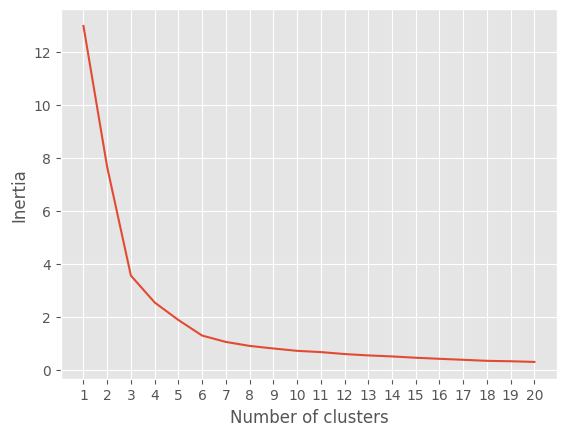

In [61]:
#Define our parameters
kmeans_kwargs = {
"init": "k-means++"
}

#plot elbow method
a = plot_elbow(KMeans, features, kmeans_kwargs)

From the plot we can see that the most optimal number of clusters is 6-7, before that the inertia is way too big and after that we can see that the score doesnt go down by much.

# K-means model

In [33]:
kmeans_model = KMeans(init='k-means++',n_clusters=6, random_state=1)
clusters_kmeans = kmeans_model.fit_predict(features)

In [34]:
# Create scatter plot using Plotly
fig = px.scatter(df, x='Horsepower', y='Weight', hover_data='Car Name', color=clusters_kmeans, color_continuous_scale="Viridis")

# Set plot title and axis labels
fig.update_layout(title='Car Scatter Plot', xaxis_title='X-axis', yaxis_title='Y-axis')

# Show the plot
fig.show()

Okay, now that looks better. We can see some clusters forming. Cluster 3 is made mainly from economic cars, cluster 5 is made from sports cars cluster 2 is for hypercars and in cluster 1 looks like there are mainly trucks. In clusters 0 and 4 the cars are somewhere in the middle between all.

We can see that the K-means model does a great job. It handled the different densities of the clusters really well, we can see how cluster 2 has a way lower density than the others and the algorithm still managed to capture the structure.There are some points which could've been assigned a better cluster though. We can  the on the border between clusters 0 and 5, the Aston Martin DB11 is closer to cluster 5 than it is cluster 0. The same can be said for the Iveco Daily between clusters 1 and 4.

We can 'look' at our data since it is 2 dimentional, but in a real life scenario that wouldnt be an option. Hence we need a way do determine if a clustering model is better. There are many metrics that help us do just that. One of them is the Silhouette Score. The Silhouette Score measures how close each point in a cluster is to points in the neighbouring clusters. The resulting score ranges from -1 to 1 and we can visualize the score for each cluster to get further insights on our model. So, for a single point i: ${s(i)} = {b(i) - a(i) \over max(a(i), b(i))}$, where $b(i)$ is the distance between i and its next nearest cluster centroid and a(i) is the avarage distance between i and all other points in it's cluster.

In [35]:
def plot_silhouette(df, clusters):
    # Calculate silhouette values
    silhouette_vals = silhouette_samples(df, clusters)
    
    # Get unique cluster labels
    unique_clusters = np.unique(clusters)
    
    # Set up figure and axis
    fig, ax = plt.subplots()
    
    colors = cm.get_cmap('viridis', len(unique_clusters))
    
    # Compute y-axis limits
    y_lower = 10
    for i, cluster in enumerate(unique_clusters):
        cluster_vals = silhouette_vals[clusters == cluster]
        cluster_size = cluster_vals.shape[0]
        y_upper = y_lower + cluster_size
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, alpha=0.7, facecolor = colors(i))
        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(cluster))
        y_lower = y_upper + 10
    
    # Set labels and title
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster label")
    ax.set_title("Silhouette plot")
    
    # Compute average silhouette score
    silhouette_avg = silhouette_score(df, clusters)
    
    # Draw vertical line at average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.annotate(
        "Average silhouette\nscore: {:.2f}".format(silhouette_avg),
        xytext=(0.87, 0.92),
        xy=(silhouette_avg, len(unique_clusters) - 0.6),
        textcoords="axes fraction",
        fontsize=10,
        ha="center",
    )
    
    return round(silhouette_avg,3)
    # Adjust spacing between subplots and display plot
    plt.tight_layout()
    plt.show()


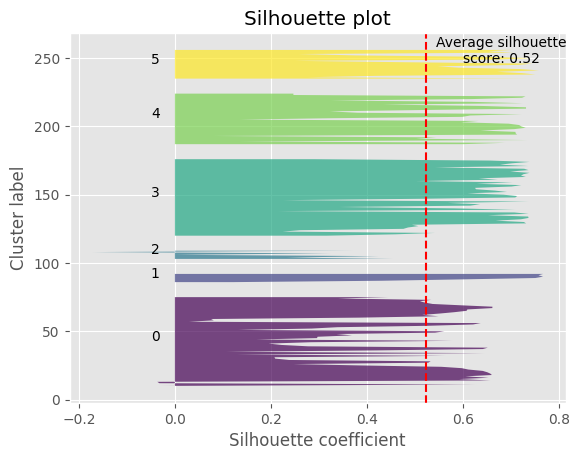

In [36]:
si_sc_kmeans = plot_silhouette(features, clusters_kmeans)

We can see that the mean sihouette score for the clusters of the k-means model is 0.52. We can see that cluster 2 has a relativley lower score compared to the other clusters. This could be because it's density is lower than the other clusters.

### Agglomerative Clustering

In [37]:
agg_model_euclidean = AgglomerativeClustering(n_clusters=6, metric='euclidean', compute_distances=True, linkage='average')
clusters_aggk_euclidean = agg_model_euclidean.fit_predict(features)

Here i am giving the function a _linkage_ parameter. The linkage parameter determines the linkage criterion to be used when merging clusters. The 'average' linkage method takes the average distance between the centers of the clusters to determine the best split. I am using the average parameter here, because the default parameter 'ward' does not support distance metrics other than euclidean.

In [38]:
# Create scatter plot using Plotly
fig = px.scatter(df, x='Horsepower', y='Weight', hover_data='Car Name', color=clusters_aggk_euclidean,color_continuous_scale="Viridis" )

# Set plot title and axis labels
fig.update_layout(title='Car Scatter Plot', xaxis_title='X-axis', yaxis_title='Y-axis')

# Show the plot
fig.show()

The main differances between the algorithms are in the cluster sizes. We can see that the Agglomerative Clustering model made 3 big clusters and 3 really small ones. The Koenigsegg Jesko is the only point in cluster 5 and clusters 3 and 2 only have 2 and 3 points in them. This might mean that these points are outliers.

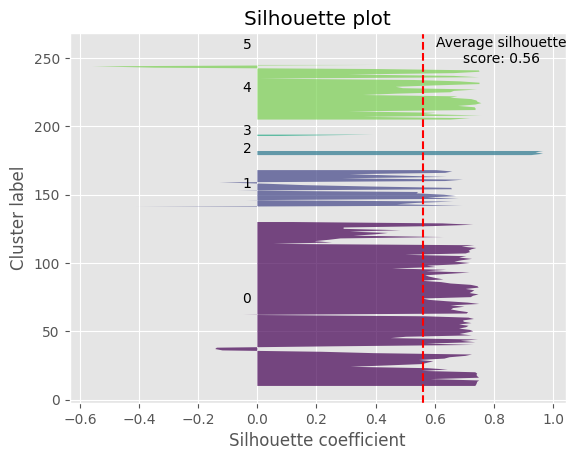

In [39]:
si_sc_agg_euc = plot_silhouette(features, clusters_aggk_euclidean)

We can see that the agglomerative clustering algorthm has a better score than the k-means despite the huge differance in the clusters themselves. The model has an average sihouette score of 0.56.

In [40]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.title("Hierarchical Clustering Dendrogram")
    dendrogram(linkage_matrix, **kwargs)
    
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

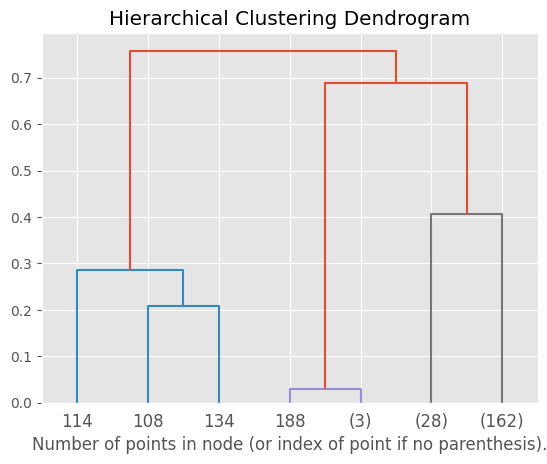

In [41]:
plot_dendrogram(agg_model_euclidean,truncate_mode="level", p=2)

The dendrogram shows us how the clusters were formed by merging (from the bottom up) or splitting (from the top down). Dendrograms are usefull tools when we want to get some more context as to how the clusters were formed. Here we can see how the model split the data to form the clusters.

#### Now let's try a different metric

In [42]:
agg_model_manhattan = AgglomerativeClustering(n_clusters=6, metric='manhattan', compute_distances=True, linkage='average')
clusters_aggk_manhattan = agg_model_manhattan.fit_predict(features)

In [43]:
# Create scatter plot using Plotly
fig = px.scatter(df, x='Horsepower', y='Weight', hover_data='Car Name', color=clusters_aggk_manhattan,color_continuous_scale="Viridis" )

# Set plot title and axis labels
fig.update_layout(title='Car Scatter Plot', xaxis_title='X-axis', yaxis_title='Y-axis')

# Show the plot
fig.show()

We can see that with the manhattan distance, the model made a bit bigger clusters. Although the hypercars are still seperated into their own clusters, now the Jesko and the Chiron make up their own cluster. That said they still can be considered outliars, but we'll get to that in a moment.

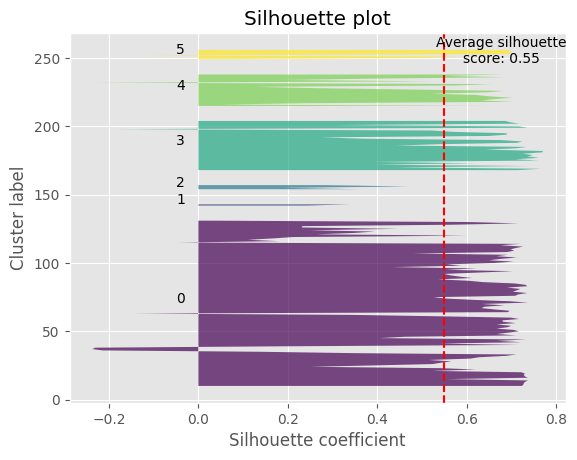

In [44]:
agg_manhattan_si_sc = plot_silhouette(features, clusters_aggk_manhattan)

The model with the  manhattan distance metric has a slightly lower sihouette score.

### DBSCAN

Okay, since we can see that there are some outliars, lets see how DBSCAN tackles our dataset.

In [45]:
dbsc_model = DBSCAN(p=2,eps=0.03, min_samples=3) #after playing with the eps parameter, i decided to use 0.03

One cool feature of the DBSCAN algorithm in sklearn is that we can set the parameter p of the minkowski distance with the metric_params parameter. This means that we can play around with it and see how much of a squircle is best for our dataset.

In [62]:
def minkowski_p_search(data_, p_values):
    
    best_value = 0
    best_score = 0
    
    for v in p_values:
        Model = DBSCAN(eps=0.03, min_samples=3,metric = 'minkowski',metric_params={'p': v})
        
        clusters = Model.fit_predict(data_)
        
        df = pd.DataFrame(data=data_,
                          columns=['X','Y'])
        
        #Adding a column for the clusters
        df['cluster'] = clusters
        
        #Removing all outliers
        df = df.loc[df['cluster'] != -1]
        
        s_sc = silhouette_score(df[['X','Y']], df['cluster'])
        
        
        if s_sc > best_score:
            best_score = s_sc
            best_value = v
    
    return round(best_value,2), round(best_score,3)

dbscan_p, si_sc_dbscan_optimal = minkowski_p_search(features, np.linspace(1,10,100))

#print best p value and score
print('Best p value:', dbscan_p)
print('Best score:', si_sc_dbscan_optimal)

Best p value: 1.55
Best score: 0.633


The optimal p value for our dataset is 1.55. This is right in the middle between euclidean and manhattan distance. This means that a squircle is the perfect shape for our model.

In [47]:
optimal_dbscan_model = DBSCAN(eps=0.03,min_samples=3, metric='minkowski', metric_params={'p':1.55})
optimal_clusters_dbscan = optimal_dbscan_model.fit_predict(features)

In [48]:
# Create scatter plot using Plotly
fig = px.scatter(df, x='Horsepower', y='Weight', hover_data='Car Name', color=optimal_clusters_dbscan, color_continuous_scale="Viridis" )

# Set plot title and axis labels
fig.update_layout(title='Car Scatter Plot', xaxis_title='X-axis', yaxis_title='Y-axis')

# Show the plot
fig.show()

We can see that the DBSCAN model deemed a big part of our data as outliers. We can also see that there are only 3 clusters. This is two times less than the 6 we selected via the elbow method. The number of clusters can change when we play with the eps paraemter. If we choose a higher value, there are going to be less clusters and if we choose a lower value there are going to be more clusters (if we pass a really high value the model may deem all datapoints as outliers).

In [49]:
#Making a df that stores the features and naming them
dbscan_df = pd.DataFrame(data=features,
                             columns=['X','Y'])

#Adding a column for the clusters
dbscan_df['cluster'] = optimal_clusters_dbscan

#Removing all outliers
dbscan_df = dbscan_df.loc[dbscan_df['cluster'] != -1]

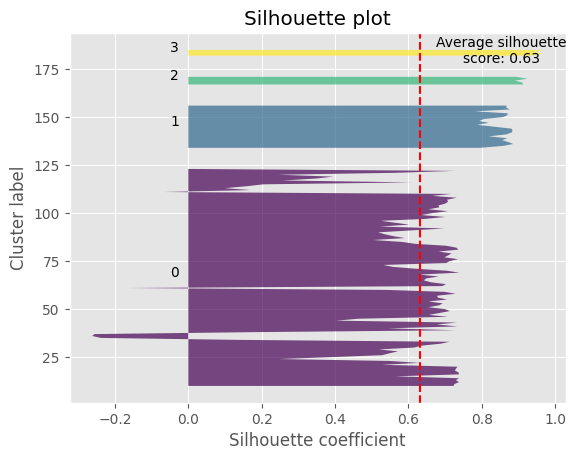

In [50]:
dbscan_sihouette_no_outliers = plot_silhouette(dbscan_df[['X','Y']], dbscan_df['cluster'])

## Conclusion

In [51]:
sih_scores = pd.DataFrame(data = {'Model':['K-means', 'Agglomerative Euclidean', 'Agglomerative Manhattan', 'DBSCAN Minkowski with Removed Outliers (p = 1.54)'], 
                                  'Score':[si_sc_kmeans, si_sc_agg_euc,agg_manhattan_si_sc, si_sc_dbscan_optimal]})            

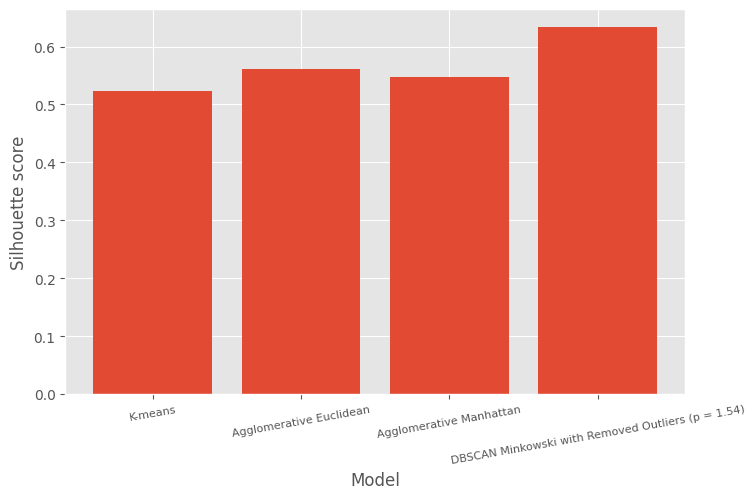

In [52]:
plt.figure(figsize=(8,5))
plt.bar(sih_scores['Model'], sih_scores['Score'])
plt.ylabel('Silhouette score')
plt.xlabel('Model')
plt.xticks(rotation = 10, size=8)
plt.show()

We can see that the model with the highest score is DBSCAN, but this is to be expected, because we removed all outliers in our dataset before calculating the score.If we look at the other 3 models, the best performer is the Agglomerative clustering algorithm with the euclidean distance metric. The model with the worst performance was the K-means model.

# Resources

StatQuest: https://www.youtube.com/@statquest

Geeksforgeeks: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

scikit-learn documentation: https://scikit-learn.org/stable/